In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge
from scipy.stats import ttest_ind
from sklearn.metrics import mean_squared_error
import numpy as np

In [12]:
weather_data = pd.read_csv('weather_prediction_dataset.csv')

In [14]:
weather_data.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


In [15]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Columns: 165 entries, DATE to TOURS_temp_max
dtypes: float64(150), int64(15)
memory usage: 4.6 MB


In [16]:
weather_data.describe()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
count,3.654000e+03,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,...,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000
mean,2.004568e+07,6.520799,5.418446,0.745107,1.017876,1.330380,0.234849,4.661193,11.022797,6.989135,...,5.104215,11.470635,3.677258,0.781872,1.016639,1.369787,0.186100,12.205802,7.860536,16.551779
std,2.874287e+04,3.450083,2.325497,0.107788,0.007962,0.935348,0.536267,4.330112,7.414754,6.653356,...,7.250744,8.950217,1.519866,0.115572,0.018885,0.926472,0.422151,6.467155,5.692256,7.714924
min,2.000010e+07,1.000000,0.000000,0.380000,0.985600,0.050000,0.000000,0.000000,-9.300000,-16.000000,...,-19.700000,-14.500000,0.700000,0.330000,0.000300,0.050000,0.000000,-6.200000,-13.000000,-3.100000
25%,2.002070e+07,4.000000,4.000000,0.670000,1.013300,0.530000,0.000000,0.500000,5.300000,2.000000,...,0.000000,4.100000,2.600000,0.700000,1.012100,0.550000,0.000000,7.600000,3.700000,10.800000
50%,2.004567e+07,7.000000,6.000000,0.760000,1.017700,1.110000,0.000000,3.600000,11.400000,7.300000,...,5.000000,11.000000,3.400000,0.800000,1.017300,1.235000,0.000000,12.300000,8.300000,16.600000
75%,2.007070e+07,10.000000,7.000000,0.830000,1.022700,2.060000,0.210000,8.000000,16.900000,12.400000,...,11.200000,19.000000,4.600000,0.870000,1.022200,2.090000,0.160000,17.200000,12.300000,22.400000
max,2.010010e+07,12.000000,8.000000,0.980000,1.040800,3.550000,7.570000,15.300000,29.000000,20.800000,...,21.200000,32.900000,10.800000,1.000000,1.041400,3.560000,6.200000,31.200000,22.600000,39.800000


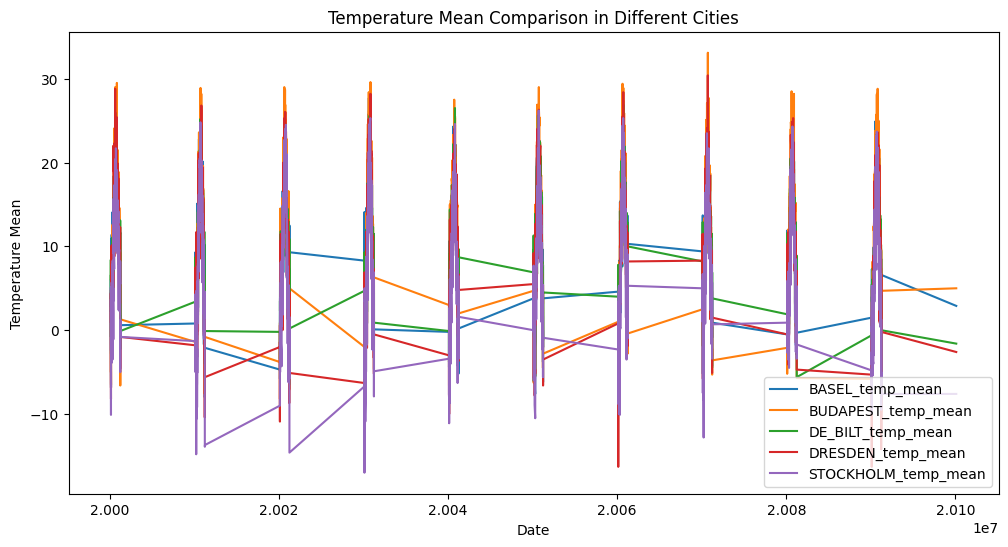

In [17]:
# Example 1: Line plot for temperature mean in different cities
plt.figure(figsize=(12, 6))
cities = ['BASEL_temp_mean', 'BUDAPEST_temp_mean', 'DE_BILT_temp_mean', 'DRESDEN_temp_mean', 'STOCKHOLM_temp_mean']
for city in cities:
    plt.plot(weather_data['DATE'], weather_data[city], label=city)

plt.title('Temperature Mean Comparison in Different Cities')
plt.xlabel('Date')
plt.ylabel('Temperature Mean')
plt.legend()
plt.show()

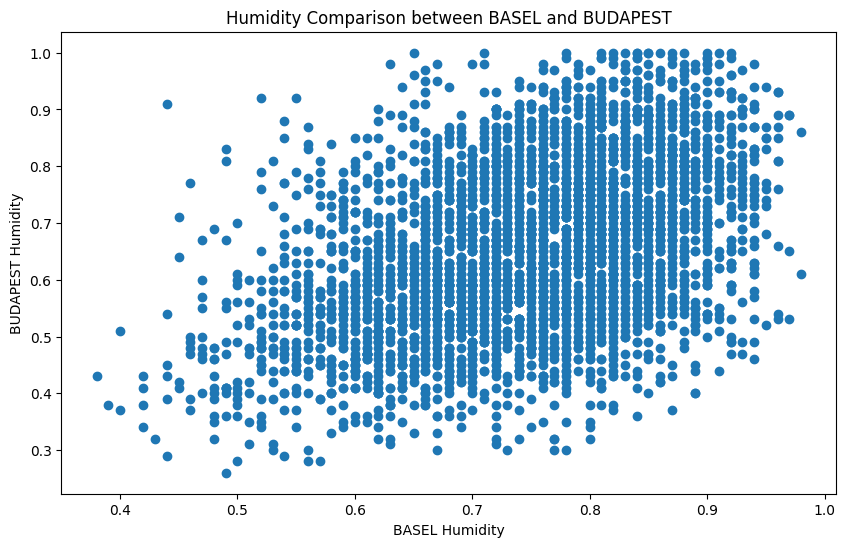

In [18]:
# Example 2: Scatter plot for humidity in BASEL and BUDAPEST
plt.figure(figsize=(10, 6))
plt.scatter(weather_data['BASEL_humidity'], weather_data['BUDAPEST_humidity'])
plt.title('Humidity Comparison between BASEL and BUDAPEST')
plt.xlabel('BASEL Humidity')
plt.ylabel('BUDAPEST Humidity')
plt.show()

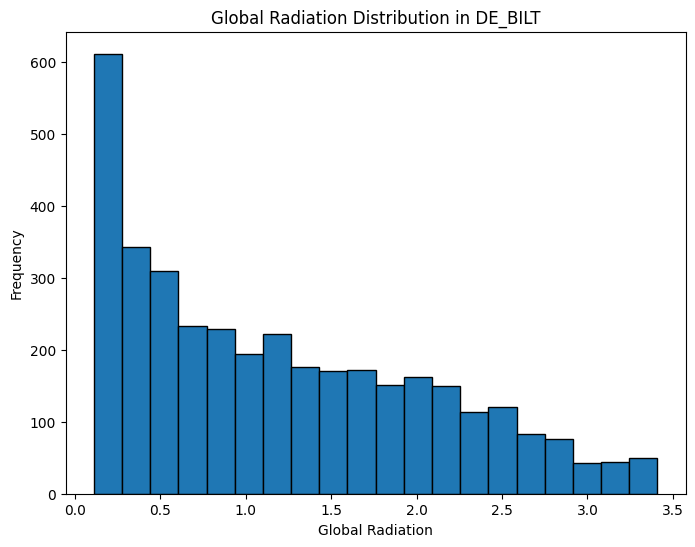

In [19]:
# Example 3: Histogram of global radiation in DE_BILT
plt.figure(figsize=(8, 6))
plt.hist(weather_data['DE_BILT_global_radiation'], bins=20, edgecolor='black')
plt.title('Global Radiation Distribution in DE_BILT')
plt.xlabel('Global Radiation')
plt.ylabel('Frequency')
plt.show()

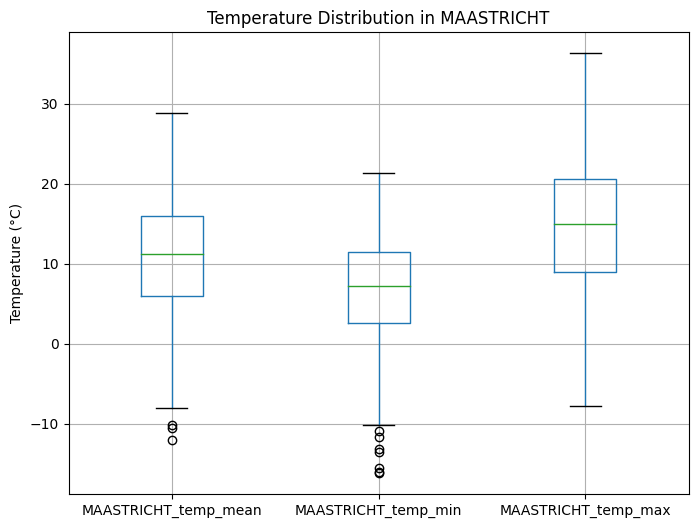

In [20]:
# Example 4: Box plot for temperature in MAASTRICHT
plt.figure(figsize=(8, 6))
weather_data.boxplot(column=['MAASTRICHT_temp_mean', 'MAASTRICHT_temp_min', 'MAASTRICHT_temp_max'])
plt.title('Temperature Distribution in MAASTRICHT')
plt.ylabel('Temperature (°C)')
plt.show()

In [21]:
# Preparing data for prediction
X = weather_data[['BASEL_temp_mean', 'BUDAPEST_temp_mean', 'DE_BILT_temp_mean', 'DRESDEN_temp_mean']]
y = weather_data['STOCKHOLM_temp_mean']

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_predictions)

In [26]:
# Decision Tree Regression
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_predictions)

In [27]:
# Random Forest Regression
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)
forest_predictions = forest_model.predict(X_test)
forest_mse = mean_squared_error(y_test, forest_predictions)

In [31]:
# Bayesian Ridge Regression
bayesian_model = BayesianRidge()
bayesian_model.fit(X_train, y_train)
bayesian_predictions, bayesian_prediction_std = bayesian_model.predict(X_test, return_std=True)
bayesian_mse = mean_squared_error(y_test, bayesian_predictions)

In [32]:
# Compare the metrics
print(f'Linear Regression Mean Squared Error: {linear_mse}')
print(f'Decision Tree Regression Mean Squared Error: {tree_mse}')
print(f'Random Forest Regression Mean Squared Error: {forest_mse}')
print(f'Bayesian Ridge Regression Mean Squared Error: {bayesian_mse}')

Linear Regression Mean Squared Error: 11.446960938502892
Decision Tree Regression Mean Squared Error: 21.61906976744186
Random Forest Regression Mean Squared Error: 11.479939469220247
Bayesian Ridge Regression Mean Squared Error: 11.446876716534302


In [28]:
# Compare the metrics
print(f'Linear Regression Mean Squared Error: {linear_mse}')
print(f'Decision Tree Regression Mean Squared Error: {tree_mse}')
print(f'Random Forest Regression Mean Squared Error: {forest_mse}')

Linear Regression Mean Squared Error: 11.446960938502892
Decision Tree Regression Mean Squared Error: 21.61906976744186
Random Forest Regression Mean Squared Error: 11.479939469220247


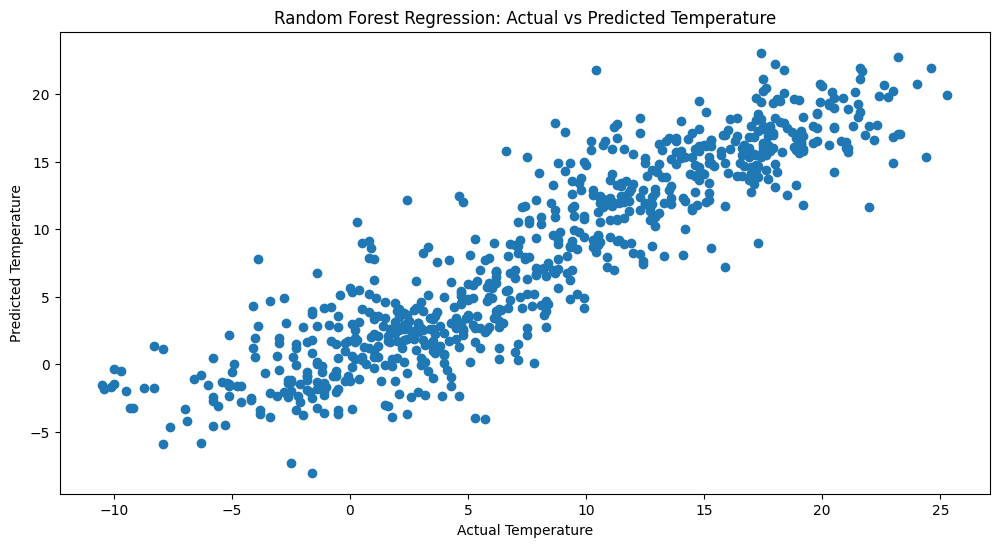

In [29]:
# Visualize the predictions of the best-performing model (Random Forest)
plt.figure(figsize=(12, 6))
plt.scatter(y_test, forest_predictions)
plt.title('Random Forest Regression: Actual vs Predicted Temperature')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.show()

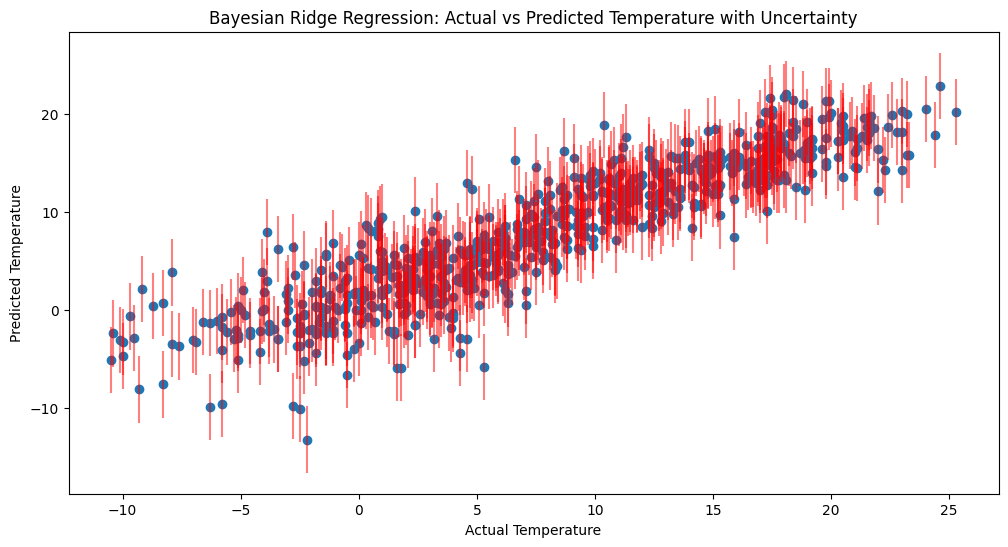

In [33]:
# Visualize the predictions along with uncertainty estimates
plt.figure(figsize=(12, 6))
plt.scatter(y_test, bayesian_predictions)
plt.errorbar(y_test, bayesian_predictions, yerr=bayesian_prediction_std, linestyle="None", alpha=0.5, color='red')
plt.title('Bayesian Ridge Regression: Actual vs Predicted Temperature with Uncertainty')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.show()

In [36]:
# Extract temperature data for BASEL and BUDAPEST
basel_temps = weather_data['BASEL_temp_mean'].dropna()
budapest_temps = weather_data['BUDAPEST_temp_mean'].dropna()

In [37]:
# Perform a t-test for the hypothesis that the means are equal
t_statistic, p_value = ttest_ind(basel_temps, budapest_temps)

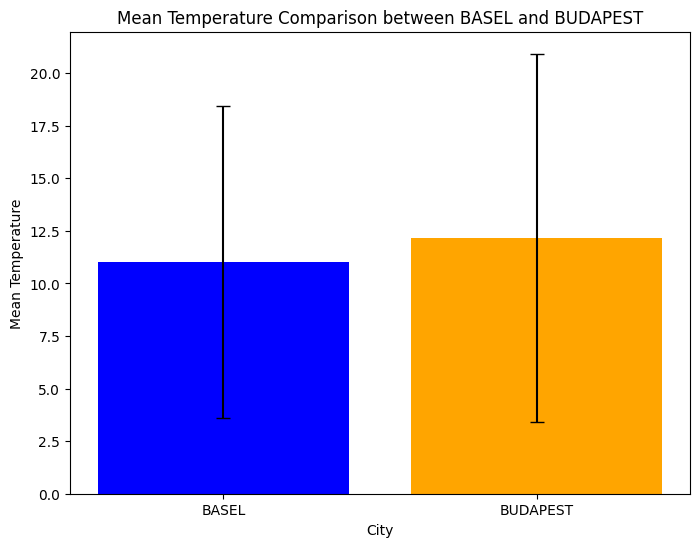

In [39]:
# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(['BASEL', 'BUDAPEST'], [basel_temps.mean(), budapest_temps.mean()], yerr=[basel_temps.std(), budapest_temps.std()], capsize=5, color=['blue', 'orange'])
plt.title('Mean Temperature Comparison between BASEL and BUDAPEST')
plt.xlabel('City')
plt.ylabel('Mean Temperature')
plt.show()

In [38]:
# Output the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is evidence that the mean temperatures are different.")
else:
    print("Fail to reject the null hypothesis: There is no significant evidence that the mean temperatures are different.")

T-statistic: -6.074159418666442
P-value: 1.3088713546473834e-09
Reject the null hypothesis: There is evidence that the mean temperatures are different.
